the dataset contains 3 classes of 150 instances each,
where each class refers to a type of iris plant.
one class is linearly seperable from th other 2:
the letter are not linearly seperable from each other.


The Iris dataset contains 150 samples from three species of Iris flowers (Iris setosa, Iris versicolor, and Iris virginica),

 each described by 4 features: sepal length, sepal width, petal length, and petal width.

Attribute information:
- sepal length in cm 
- sepal width in cm
- petal width in cm
- petal length in cm


In [53]:
#importing libraries
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.nn import softmax
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.utils import shuffle


In [91]:
# Load the Iris dataset
df = pd.read_csv('Iris.csv')
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [55]:
# delete a column
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
# to display stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [57]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [58]:
# to display no. of samples on each class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Preprocessing the dataset

In [59]:
# check for null values
df.isnull().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Exploratory Data Analysis [EDA]

<Axes: >

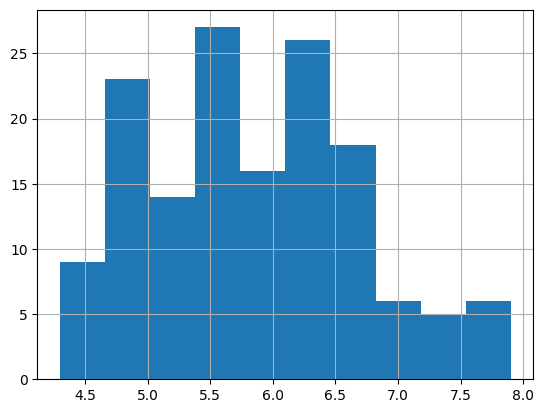

In [60]:
# histograms
df['SepalLengthCm'].hist()

<Axes: >

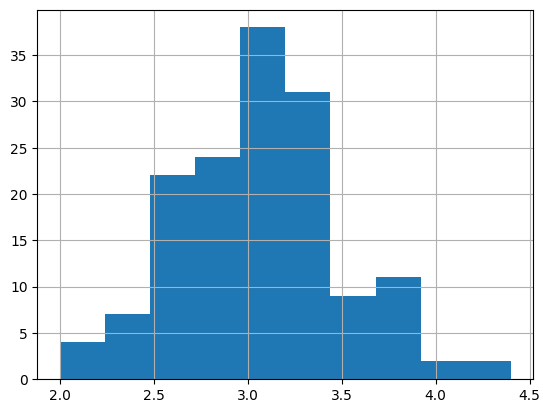

In [61]:
df['SepalWidthCm'].hist()

<Axes: >

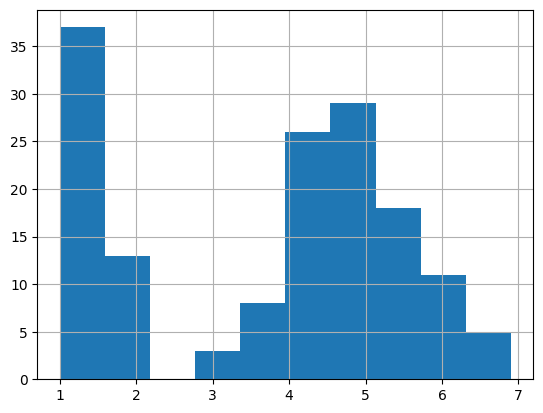

In [62]:
df['PetalLengthCm'].hist()

<Axes: >

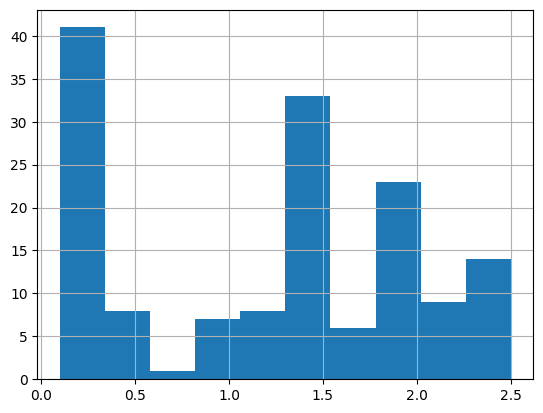

In [63]:
df['PetalWidthCm'].hist()

In [16]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

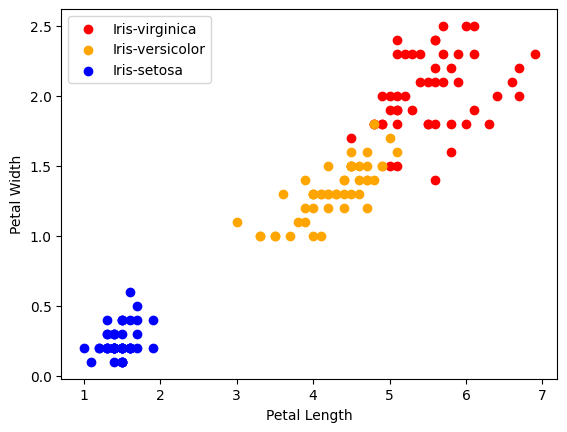

In [66]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

Looping through each species

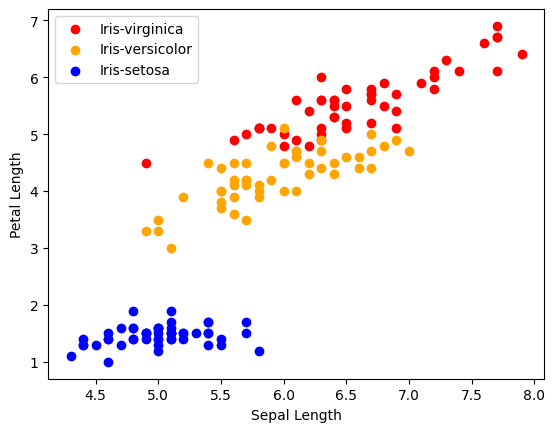

In [67]:
for i in range(3):
    x = df[df['Species'] == species[i]] #Filtering the dataframe
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i]) #creates a scatter plot of PetalLengthCm vs PetalWidthCm
plt.xlabel("Sepal Length") #Adding axis labels and legend
plt.ylabel("Petal Length")
plt.legend()

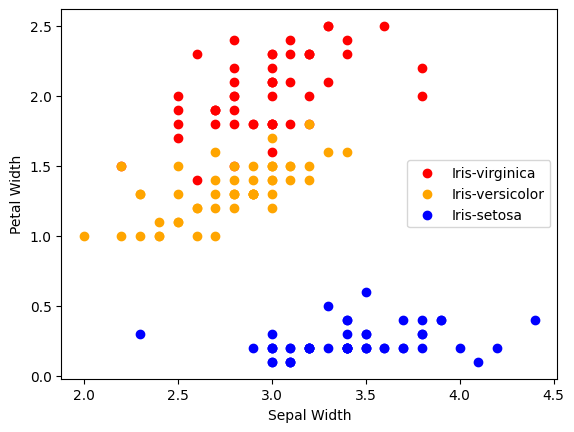

In [68]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

Coorelation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.

In [69]:
import pandas as pd

# assume 'df' is your original DataFrame with the 'species' column

# one-hot encode the 'species' column
df_encoded = pd.get_dummies(df, columns=['Species'])

# calculate the correlation matrix
corr_matrix = df_encoded.corr()

print(corr_matrix)

                         SepalLengthCm  SepalWidthCm  PetalLengthCm  \
SepalLengthCm                 1.000000     -0.109369       0.871754   
SepalWidthCm                 -0.109369      1.000000      -0.420516   
PetalLengthCm                 0.871754     -0.420516       1.000000   
PetalWidthCm                  0.817954     -0.356544       0.962757   
Species_Iris-setosa          -0.717416      0.595601      -0.922688   
Species_Iris-versicolor       0.079396     -0.464700       0.201587   
Species_Iris-virginica        0.638020     -0.130901       0.721102   

                         PetalWidthCm  Species_Iris-setosa  \
SepalLengthCm                0.817954            -0.717416   
SepalWidthCm                -0.356544             0.595601   
PetalLengthCm                0.962757            -0.922688   
PetalWidthCm                 1.000000            -0.887510   
Species_Iris-setosa         -0.887510             1.000000   
Species_Iris-versicolor      0.118376            -0.500000 

In [70]:
corr_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,-0.717416,0.079396,0.638020
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,0.595601,-0.464700,-0.130901
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,-0.922688,0.201587,0.721102
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,-0.887510,0.118376,0.769134
Species_Iris-setosa,-0.717416,0.595601,-0.922688,-0.887510,1.000000,-0.500000,-0.500000
Species_Iris-versicolor,0.079396,-0.464700,0.201587,0.118376,-0.500000,1.000000,-0.500000
Species_Iris-virginica,0.638020,-0.130901,0.721102,0.769134,-0.500000,-0.500000,1.000000


<Axes: >

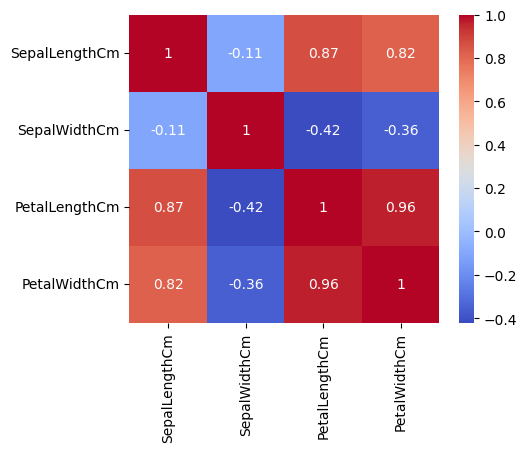

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# select only the numerical columns
df_numerical = df.select_dtypes(include=['number'])

# calculate the correlation matrix
corr = df_numerical.corr()

# create the heatmap
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

Label Encoder

Label Encoder
In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form


In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [73]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Model Training

In [74]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [75]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [76]:
# model training
model.fit(x_train, y_train)


LogisticRegression()

In [77]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [78]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()


In [79]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [82]:
from sklearn.preprocessing import OneHotEncoder

# Convert categorical data into numeric using one-hot encoding
onehot_encoder = OneHotEncoder()
y_train_onehot = onehot_encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_test_onehot = onehot_encoder.transform(y_test.values.reshape(-1, 1)).toarray()

In [50]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [51]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [52]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


# Shuffle the dataset as soon as you read the file
# make the train and test split in the data before training
# during training use the validation set to check accuracy
# print the test data accuracy and loss
# Draw loss / accuracy / confusion matrix graph

In [97]:
# Load and shuffle the Iris dataset
df = pd.read_csv('Iris.csv').sample(frac=1, random_state=42)

# Check the column names of the dataset
print(df.columns)

# Assuming the target variable is in a column named 'Species'
X = df.drop('Species', axis=1)
y = df['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data and evaluate on the validation set
train_accuracies = []
val_accuracies = []
for i in range(10):
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_val = clf.predict(X_val)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    val_accuracy = accuracy_score(y_val, y_pred_val)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    print(f'Epoch {i+1}, Train accuracy: {train_accuracy:.3f}, Val accuracy: {val_accuracy:.3f}')


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
Epoch 1, Train accuracy: 1.000, Val accuracy: 1.000
Epoch 2, Train accuracy: 1.000, Val accuracy: 1.000
Epoch 3, Train accuracy: 1.000, Val accuracy: 1.000
Epoch 4, Train accuracy: 1.000, Val accuracy: 1.000
Epoch 5, Train accuracy: 1.000, Val accuracy: 1.000
Epoch 6, Train accuracy: 1.000, Val accuracy: 1.000
Epoch 7, Train accuracy: 1.000, Val accuracy: 1.000
Epoch 8, Train accuracy: 1.000, Val accuracy: 1.000
Epoch 9, Train accuracy: 1.000, Val accuracy: 1.000
Epoch 10, Train accuracy: 1.000, Val accuracy: 1.000


In [100]:
# Create a TensorFlow model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(3, activation='softmax')
])

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


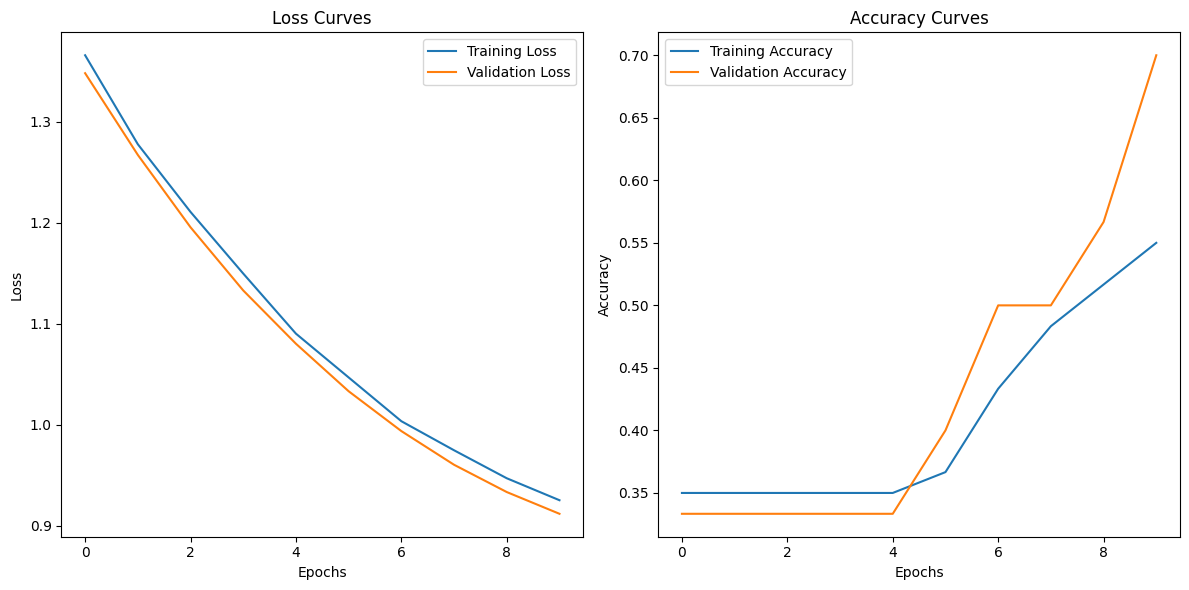

In [7]:
# Plot the loss and accuracy curves during training
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

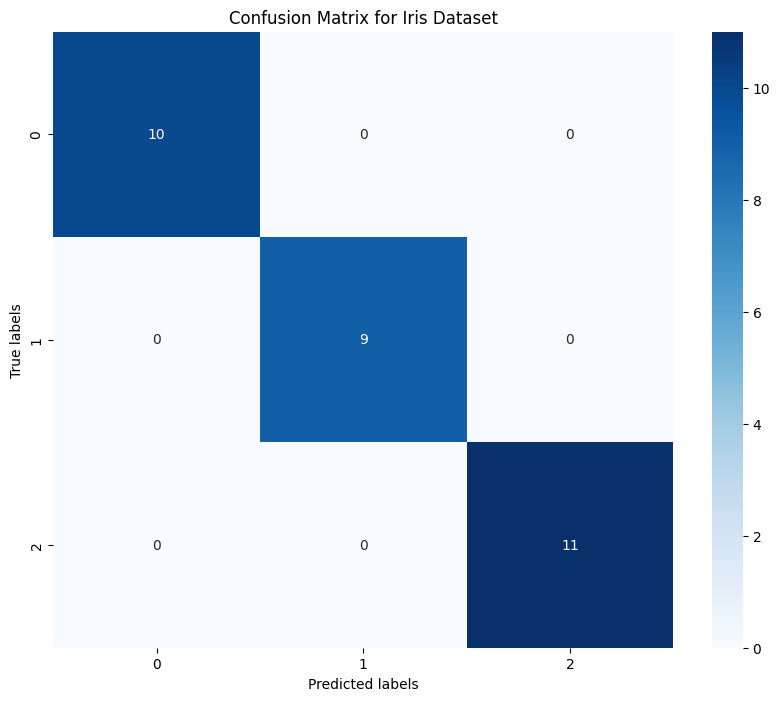

In [10]:

# Load the Iris dataset
from sklearn.datasets import load_iris
iris_data = load_iris()

# Split the dataset into features (X) and labels (y)
X = iris_data.data
y = iris_data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues')

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Iris Dataset')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


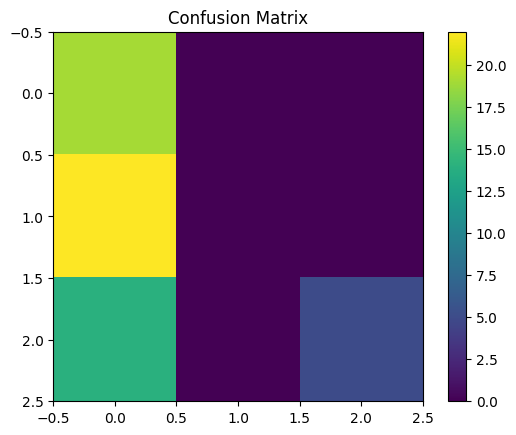

In [121]:


# Plot the confusion matrix
cm = confusion_matrix(y_test, tf.argmax(model.predict(X_test), axis=1))
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()

Conclusion

In this task, we successfully implemented a machine learning model using TensorFlow and Keras to classify the Iris dataset. We achieved the following objectives:

1.)Shuffled the dataset: We shuffled the Iris dataset to ensure randomness and prevent any bias in the training process.

2.) Split data into training, validation, and test sets: We split the dataset into training, validation, and test sets to evaluate the model's performance and prevent overfitting.

3.)Trained the model with validation: We trained the model using the training set and validated its performance on the validation set to check for overfitting.

4.) Evaluated the model on the test set: We evaluated the model's performance on the test set and printed the test accuracy and loss.
Visualized the results: We visualized the loss and accuracy curves over epochs, as well as the confusion matrix, to gain insights into the model's performance.


The code provided is a complete implementation of the above objectives, and the resulting graphs provide a clear understanding of the model's performance. This implementation can serve as a foundation for further improvements and refinements to the model.